(540, 2500) (540,)


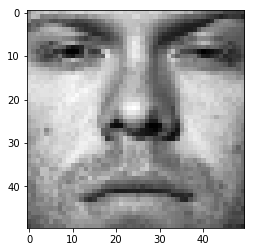

In [32]:
# 1. Eigenface for face recognition
# (b)

import numpy as np
from scipy import misc
from sklearn import linear_model
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline

train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = misc.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)
print(train_data.shape, train_labels.shape)
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

(100, 2500) (100,)


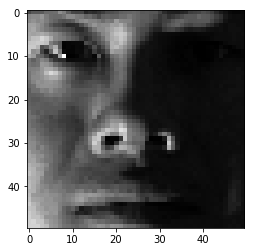

In [8]:
test_labels, test_data = [], []
for line in open('./faces/test.txt'):
    im = misc.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)
print(test_data.shape, test_labels.shape)
plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

(2500,)


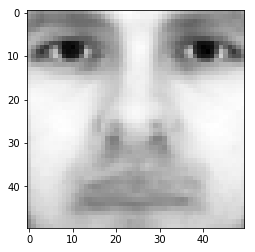

In [10]:
# (c)

avg_face = np.mean(train_data, axis = 0)
print(avg_face.shape)
plt.imshow(avg_face.reshape(50,50), cmap = cm.Greys_r)
plt.show()

(540, 2500)


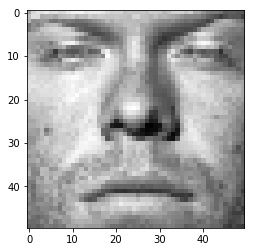

In [11]:
# (d)

train_demean = train_data - avg_face
print(train_demean.shape)
plt.imshow(train_demean[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

(100, 2500)


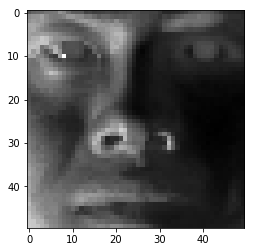

In [12]:
test_demean = test_data - avg_face
print(test_demean.shape)
plt.imshow(test_demean[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

(540, 2500)


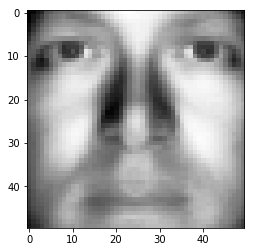

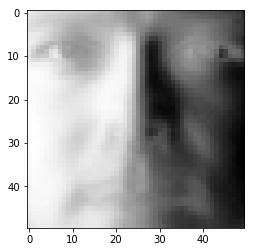

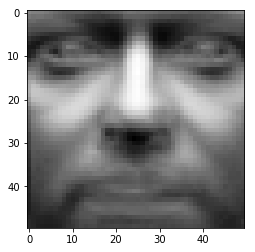

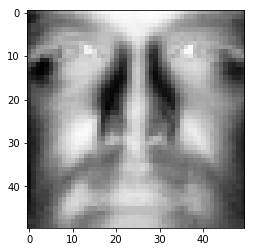

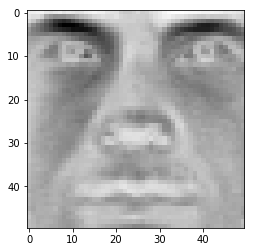

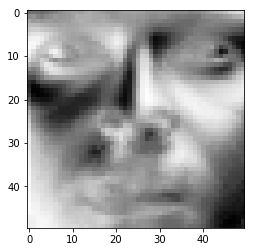

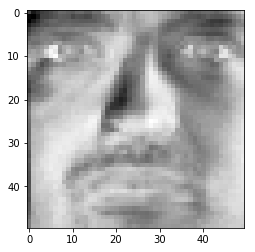

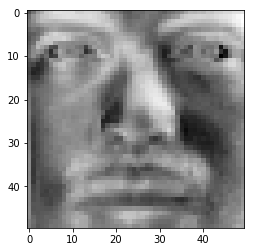

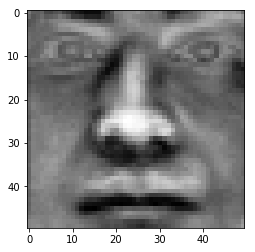

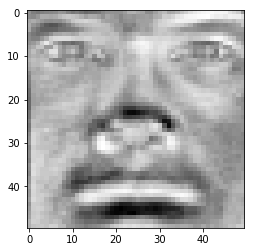

In [37]:
# (e)

U, s, V = np.linalg.svd(train_demean, full_matrices=False)
print(V.shape)
for i in range(10):
    plt.imshow(V[i, :].reshape(50,50), cmap = cm.Greys_r)
    plt.show()

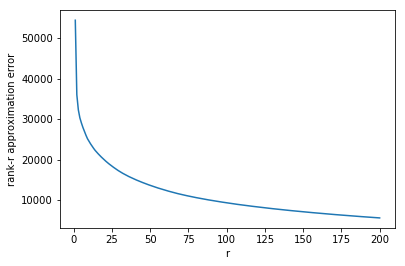

In [38]:
# (f)

def low_rank_approx(r):
    S = np.diag(s)
    return np.dot(U[:,:r], np.dot(S[:r,:r], V[:r,:]))

r = np.arange(1, 201)
errors = []
for i in range(1, 201):
    error = np.linalg.norm(train_demean - low_rank_approx(i))
    errors.append(error)
plt.plot(r, errors)
plt.xlabel("r")
plt.ylabel("rank-r approximation error")
plt.show()

In [39]:
# (g)

def feature_matrix_train(r):
    return np.matmul(train_demean, np.transpose(V[:r,:]))

def feature_matrix_test(r):
    return np.matmul(test_demean, np.transpose(V[:r,:]))


0.79


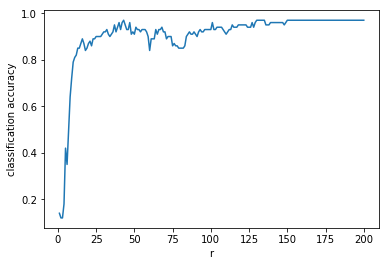

In [40]:
# (h)

def acc(r):
    F = feature_matrix_train(r)
    F_test = feature_matrix_test(r)
    cls = linear_model.LogisticRegression(multi_class = 'ovr')
    cls.fit(F, train_labels)
    return cls.score(F_test, test_labels)

print(acc(10))

accs = []
r = np.arange(1, 201)
for i in range(1, 201):
    accs.append(acc(i))
plt.plot(r, accs)
plt.xlabel("r")
plt.ylabel("classification accuracy")
plt.show()